In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")

df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
df.drop('education', axis= 1, inplace= True)

In [4]:
df.rename(columns={"TenYearCHD": "CHD"}, inplace= True)

df.isna().sum()
# CHD is Congenital Heart Disease


male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CHD                  0
dtype: int64

<Axes: xlabel='male', ylabel='count'>

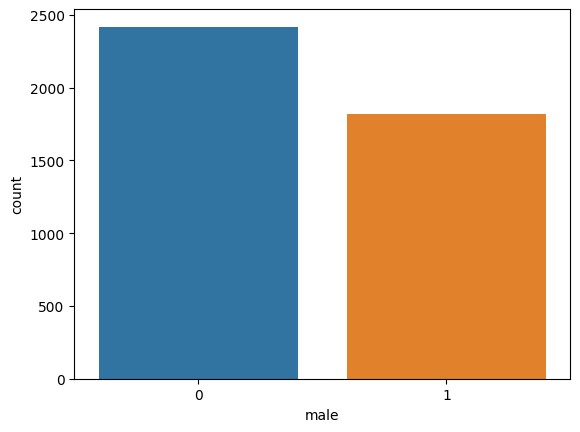

In [5]:
sns.countplot(x= df['male'])

<Axes: xlabel='male', ylabel='count'>

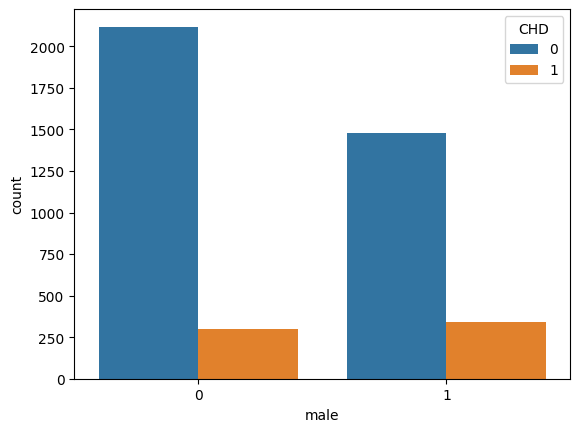

In [6]:
sns.countplot(x= df['male'], hue= df['CHD'])

<Axes: >

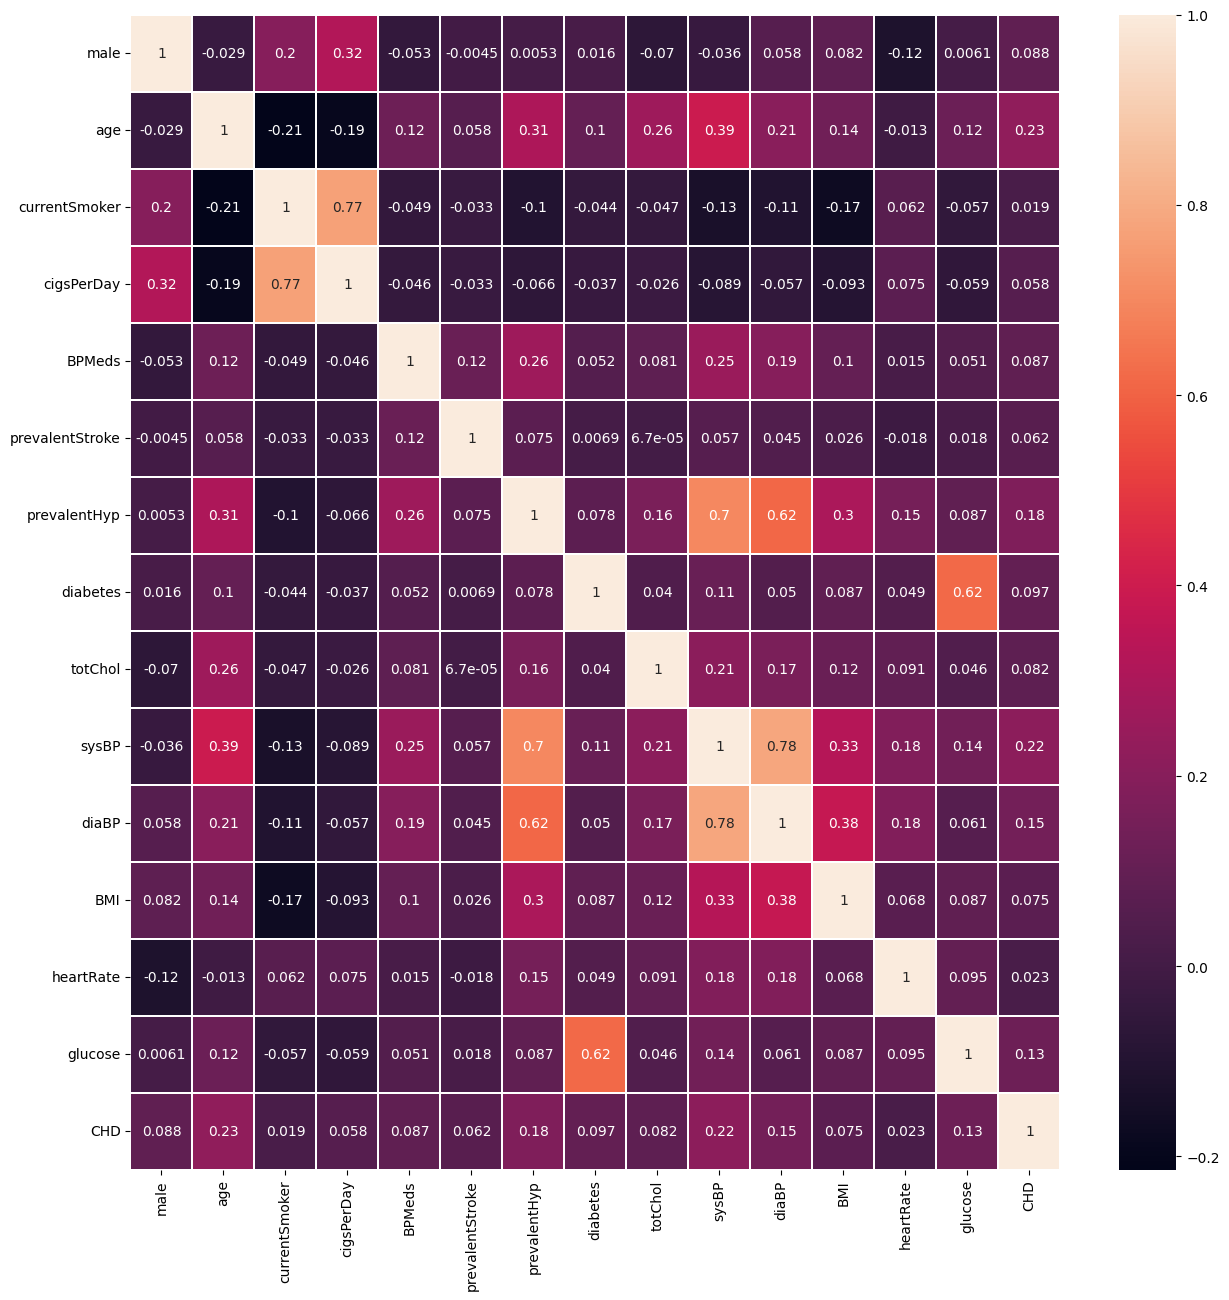

In [7]:
plt.figure(figsize= (15, 15))

sns.heatmap(df.corr(), annot= True, linewidth= 0.1)

In [8]:
df.drop(['currentSmoker', 'diaBP'], axis= 1, inplace= True)

In [9]:
df = df[~ (df['sysBP'] > 220)]
# Deleting the outliers in sysBP of data

df = df[~ (df['BMI'] > 43)]

df = df[~ (df['heartRate'] > 125)]

df = df[~ (df['glucose'] > 200)]

df = df[~ (df['totChol'] > 450)]

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [10]:
print(df.isna().sum())

male                 0
age                  0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
BMI                 18
heartRate            1
glucose            387
CHD                  0
dtype: int64


In [11]:
scaler = StandardScaler()

# Define the list of columns to standardize
cols_to_standardise = ['age', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay', 'BPMeds']

# Apply the standard scaler
df[cols_to_standardise] = scaler.fit_transform(df[cols_to_standardise])

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(strategy='most_frequent')#Creating an instance of simple Imputer which will be used to fill the null vlaues
df = pd.DataFrame(imputer.fit_transform(df))

df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,-1.228258,-0.758014,-0.17006,0.0,0.0,0.0,-0.952300,-1.221126,0.317845,0.357375,-0.216982,0.0
1,0.0,-0.410835,-0.758014,-0.17006,0.0,0.0,0.0,0.315339,-0.512683,0.767766,1.619676,-0.284731,0.0
2,1.0,-0.177285,0.916867,-0.17006,0.0,0.0,0.0,0.200099,-0.205691,-0.098844,-0.063392,-0.691225,0.0
3,0.0,1.340787,1.754308,-0.17006,0.0,1.0,0.0,-0.260861,0.856973,0.729421,-0.904926,1.544489,1.0
4,0.0,-0.410835,1.168100,-0.17006,0.0,0.0,0.0,1.122017,-0.087618,-0.671472,0.778142,0.325009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,1.0,0.056264,-0.674270,-0.17006,0.0,1.0,0.0,1.767360,2.226628,0.062207,-0.820773,0.392758,1.0
4176,1.0,0.173039,2.842981,-0.17006,0.0,0.0,0.0,-0.675724,-0.252921,-1.538082,-0.904926,-0.826722,0.0
4177,0.0,-0.177285,0.916867,-0.17006,0.0,0.0,0.0,0.269243,-0.040388,-0.952673,0.693989,0.392758,0.0
4178,0.0,-0.644385,0.498147,-0.17006,0.0,0.0,0.0,-0.606580,-0.252921,-1.678683,0.862295,-0.352480,0.0


In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [15]:
lr = LogisticRegression()

clf = lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

accuracy_score(y_pred, y_test)

0.8648325358851675

In [16]:
tree = DecisionTreeClassifier(max_depth=3) 
clf = tree.fit(x_train,y_train) 
y_pred = clf.predict(x_test) 
accuracy_score(y_pred,y_test)

0.8600478468899522

In [17]:
rf = RandomForestClassifier()
clf = rf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.8576555023923444